# Melakukan Klasifikasi pada Data Set (Bunga) Iris
---

Pada bagian ini akan dilakukan eksplorasi  _library_ sklearn dengan menggunakan dataset iris

## Pembacaan data ##
Pembacaan dataset iris dilakukan dengan menggunakan modul __datasets__ pada __sklearn__

In [36]:
from sklearn.datasets import load_iris

iris_data = load_iris()

print(iris_data.data.shape)
print(iris_data.target.shape)

(150, 4)
(150,)


## Persiapan algoritma machine learning yang akan digunakan
Terdapat empat algoritma machine learning yang akan digunakan yaitu:
* [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)
* [Decision Tree Learning](http://scikit-learn.org/stable/modules/tree.html)
* [kNN](http://scikit-learn.org/stable/modules/neighbors.html )
* [Multi Layer Perceptron](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)

akan di lakukan __import__ modul-modul yang diperlukan dari _library_ __sklearn__ dan melakukan import fungsi untuk pengukuran kinerja model

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.xkcd()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Pembelajaran

### 1. Melakukan pembelajaran penuh

### 1. Melakukan pembelajaran dengan train test split 90%(train) dan 10%(test)

Split dilakukan dengan menggunakan fungsi __train_test_split__ dari modul __model_selection__

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size = 0.1, shuffle=True,
                                                   stratify=iris_data.target)

#### A. Naive Bayes

* __Melakukan training pada data train__

In [4]:
model_NB = GaussianNB()
print("Start Naive Bayes Model training...")
model_NB.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start Naive Bayes Model training...
Training done...


* __Melakukan prediksi pada data test__

In [5]:
y_hat = model_NB.predict(X_test) #Hasil prediksi disimpan dalam sebuah vektor y_hat

* __Mengukur kinerja model__


In [6]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      1.00      1.00         5
  virginica       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        15

Accuracy: 100.0%


* __Menampilkan confusion matrix__

[[5 0 0]
 [0 5 0]
 [0 0 5]]


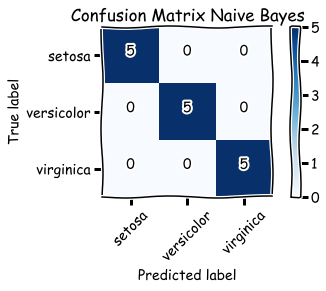

In [7]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix Naive Bayes')
plt.show()

* __Menyimpan model ke file eksternal__

In [8]:
from sklearn.externals import joblib
joblib.dump(model_NB, 'models/NaiveBayes.pkl')

['models/NaiveBayes.pkl']

#### B. Decision Tree
* __Melakukan training pada data train__

In [9]:
model_DTL = DecisionTreeClassifier(criterion='entropy')
print("Start DTL training...")
model_DTL.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start DTL training...
Training done...


* __Melakukan prediksi pada data test__

In [10]:
y_hat = model_DTL.predict(X_test)

* __Mengukur kinerja model__

In [11]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      1.00      1.00         5
  virginica       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        15

Accuracy: 100.0%


* __Menampilkan confusion matrix__

[[5 0 0]
 [0 5 0]
 [0 0 5]]


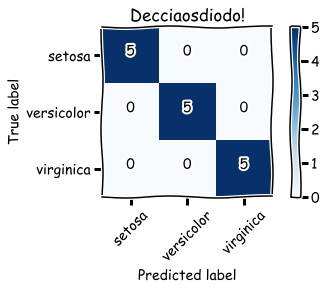

In [12]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix DTL')
plt.show()

* __Menyimpan model ke file eksternal__

In [13]:
joblib.dump(model_DTL, 'models/DTL.pkl')

['models/DTL.pkl']

#### C. kNN
* __Melakukan training pada data train__

In [14]:
model_kNN = KNeighborsClassifier(n_neighbors=5)
print("Start kNN training...")
model_kNN.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start kNN training...
Training done...


* __Melakukan prediksi pada data test__

In [15]:
y_hat = model_kNN.predict(X_test)

In [16]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      0.80      0.89         5
  virginica       0.83      1.00      0.91         5

avg / total       0.94      0.93      0.93        15

Accuracy: 93.3333333333%


[[5 0 0]
 [0 4 1]
 [0 0 5]]


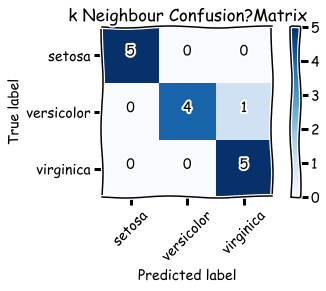

In [17]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix KNN')
plt.show()

In [18]:
joblib.dump(model_kNN, 'models/kNN.pkl')

['models/kNN.pkl']

#### D. Multi Layer Perceptron

In [19]:
model_MLP = MLPClassifier(activation='relu', hidden_layer_sizes=(10,),max_iter=1000, random_state=10)
print("Start MLP training...")
model_MLP.fit(X_train, y_train) #MELAKUKAN TRAINING
print("Training done...")

Start MLP training...
Training done...


C:\Users\GE60\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [20]:
y_hat = model_MLP.predict(X_test)

In [21]:
print(classification_report(y_test, y_hat, target_names=iris_data.target_names))
print("Accuracy:", accuracy_score(y_test,y_hat)*100,end=""); print("%")

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       1.00      0.80      0.89         5
  virginica       0.83      1.00      0.91         5

avg / total       0.94      0.93      0.93        15

Accuracy: 93.3333333333%


[[5 0 0]
 [0 4 1]
 [0 0 5]]


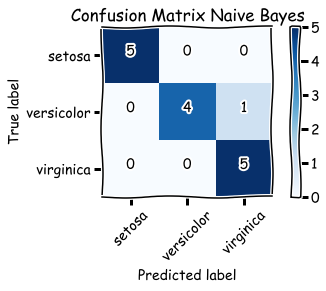

In [22]:
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=iris_data.target_names,
                      title='Confusion Matrix MLP')
plt.show()

In [23]:
joblib.dump(model_MLP, 'models/MLP.pkl')

['models/MLP.pkl']

### 2. Melakukan pembelajaran dengan 10-fold cross validation

cross validation menggunakan class __StratifiedKFold__

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
folds = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
folds.get_n_splits(iris_data.data, iris_data.target)

10

### A. Training

In [27]:
model_NB_KF = GaussianNB()
model_DTL_KF = DecisionTreeClassifier(criterion='entropy')
model_kNN_KF = KNeighborsClassifier(n_neighbors=5)
model_MLP_KF = MLPClassifier(hidden_layer_sizes=(10,), random_state=10, max_iter=1000)

accuracy_NB = []
accuracy_DTL = []
accuracy_kNN = []
accuracy_MLP = []

recall_mean_NB = []
recall_mean_DTL = []
recall_mean_kNN = []
recall_mean_MLP = []

prec_mean_NB = []
prec_mean_DTL = []
prec_mean_kNN = []
prec_mean_MLP = []

In [28]:
for train_index, test_index in folds.split(iris_data.data, iris_data.target):
    X_train, X_test = iris_data.data[train_index], iris_data.data[test_index]
    y_train, y_test = iris_data.target[train_index], iris_data.target[test_index]
    #Train ALL MODEL
    model_NB_KF.fit(X_train, y_train)
    model_DTL_KF.fit(X_train, y_train)
    model_kNN_KF.fit(X_train, y_train)
    model_MLP_KF.fit(X_train, y_train)
    #Pedict the y
    y_hat_NB = model_NB_KF.predict(X_test)
    y_hat_DTL = model_DTL_KF.predict(X_test)
    y_hat_kNN = model_kNN_KF.predict(X_test)
    y_hat_MLP = model_MLP_KF.predict(X_test)
    #Measure performance
    accuracy_NB.append(accuracy_score(y_test, y_hat_NB))
    accuracy_DTL.append(accuracy_score(y_test, y_hat_DTL))
    accuracy_kNN.append(accuracy_score(y_test, y_hat_kNN))
    accuracy_MLP.append(accuracy_score(y_test, y_hat_MLP))
    
    prec_mean_NB.append(precision_score(y_test, y_hat_NB, average='macro'))
    prec_mean_DTL.append(precision_score(y_test, y_hat_DTL,average='macro'))
    prec_mean_kNN.append(precision_score(y_test, y_hat_kNN,average='macro'))
    prec_mean_MLP.append(precision_score(y_test, y_hat_MLP,average='macro'))
    
    recall_mean_NB.append(recall_score(y_test, y_hat_NB, average='macro'))
    recall_mean_DTL.append(recall_score(y_test, y_hat_DTL,average='macro'))
    recall_mean_kNN.append(recall_score(y_test, y_hat_kNN,average='macro'))
    recall_mean_MLP.append(recall_score(y_test, y_hat_MLP,average='macro'))

C:\Users\GE60\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### B. Mengukur kinerja model

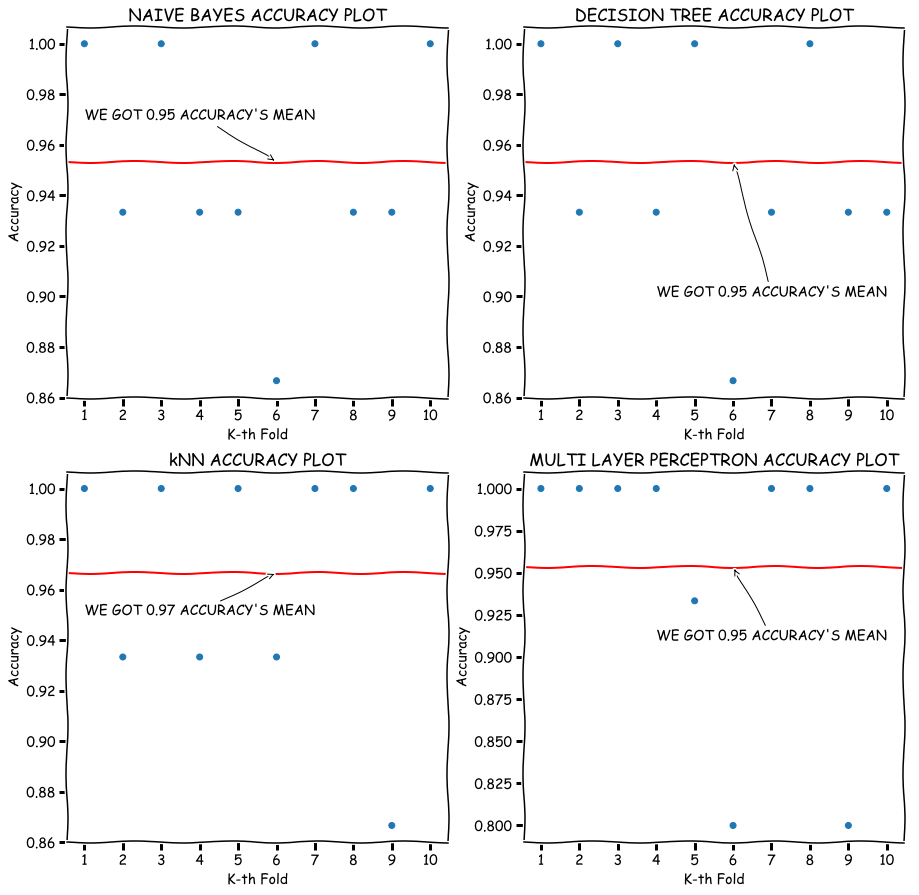

In [130]:
plt.figure(1,figsize=(15,15))

#NAIVE BAYES PLOT
plt.subplot(221)
plt.title("NAIVE BAYES ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
plt.xticks(range(10),range(1,11))
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_NB, 'o')
plt.axhline(y=np.mean(accuracy_NB), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_NB), xy=(5,np.mean(accuracy_NB)),
            arrowprops=dict(arrowstyle='->'), xytext=(0,0.97))


plt.subplot(222)
plt.xticks(range(10),range(1,11))
plt.title("DECISION TREE ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_DTL, 'o')
plt.axhline(y=np.mean(accuracy_DTL), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_DTL), xy=(5,np.mean(accuracy_DTL)),
            arrowprops=dict(arrowstyle='->'), xytext=(3,0.90))


plt.subplot(223)
plt.title("kNN ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
plt.xticks(range(10),range(1,11))
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_kNN, 'o')
plt.axhline(y=np.mean(accuracy_kNN), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_kNN), xy=(5,np.mean(accuracy_kNN)),
            arrowprops=dict(arrowstyle='->'), xytext=(0,0.95))

plt.subplot(224)
plt.title("MULTI LAYER PERCEPTRON ACCURACY PLOT")
plt.xlabel("K-th Fold")
plt.ylabel("Accuracy")
plt.xticks(range(10),range(1,11))
#plt.yticks([np.mean(accuracy_NB)],[0.95])
plt.plot(accuracy_MLP, 'o')
plt.axhline(y=np.mean(accuracy_MLP), color='r', linestyle='-')
plt.annotate("WE GOT %.2f ACCURACY'S MEAN" % np.mean(accuracy_MLP), xy=(5,np.mean(accuracy_MLP)),
            arrowprops=dict(arrowstyle='->'), xytext=(3,0.91))
plt.show()

In [127]:
#PRINT PRECISION MEAN
print("PRECISION MEAN")
print("---------------------------------------------")
print("Naive Bayes: %.2f (+/-)" % np.mean(prec_mean_NB),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_NB)))
print("DTL: %.2f (+/-)" % np.mean(prec_mean_DTL),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_DTL)))
print("KNN: %.2f (+/-)" % np.mean(prec_mean_kNN),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_kNN)))
print("MLP: %.2f (+/-)" % np.mean(prec_mean_MLP),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_MLP)))

PRECISION MEAN
---------------------------------------------
Naive Bayes: 0.96 (+/-) 0.08
DTL: 0.96 (+/-) 0.07
KNN: 0.97 (+/-) 0.07
MLP: 0.96 (+/-) 0.13


In [129]:
#PRINT PRECISION MEAN
print("RECALL MEAN")
print("---------------------------------------------")
print("Naive Bayes: %.2f (+/-)" % np.mean(recall_mean_NB),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_NB)))
print("DTL: %.2f (+/-)" % np.mean(recall_mean_DTL),end=' ')
print("%.2f" % (2.0*np.std(prec_mean_DTL)))
print("KNN: %.2f (+/-)" % np.mean(recall_mean_kNN),end=' ')
print("%.2f" % (2.0*np.std(recall_mean_kNN)))
print("MLP: %.2f (+/-)" % np.mean(recall_mean_MLP),end=' ')
print("%.2f" % (2.0*np.std(recall_mean_MLP)))

RECALL MEAN
---------------------------------------------
Naive Bayes: 0.95 (+/-) 0.08
DTL: 0.95 (+/-) 0.07
KNN: 0.97 (+/-) 0.09
MLP: 0.95 (+/-) 0.16
